In [1]:
import sqlite3

# Creating a database connection
conn = sqlite3.connect("transit_safety.db")
cursor = conn.cursor()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_path = "data/Major_Safety_Events.csv"
df = pd.read_csv(data_path)
df.head()

/var/folders/8v/ms_zr9kd3_n0l_v4my0rcbn40000gn/T/ipykernel_92426/3503120388.py:2: DtypeWarning: Columns (18,20,24,34,38,45,46,49,53,54,60,63,64,69,71) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path)


,NTD ID,Agency,Primary UZA UACE Code,Rail/Bus/Ferry,Mode Name,Mode,TOS,Fixed Route Flag,Year,Event Description,...,Occupant of Other Vehicle Injuries,Occupant of Other Vehicle Serious Injuries,Other Injuries,Other Serious Injuries,Suicide Injuries,Suicide Serious Injuries,Trespasser Inuries (Subtotal),Trespasser Serious Injuries (Subtotal),Total Serious Injuries,Person List
0,20080,New Jersey Transit Corporation,63217,Bus,Bus,MB,DO,True,2024,Bus was parked in <REDACTED> <REDACTED> and an...,...,0,0,0,0,0,0,0,0,0,NaN
1,40035,Central Florida Regional Transportation Authority,65863,Bus,Demand Response,DR,DO,False,2024,Another vehicle made other front contact with ...,...,1,0,0,0,0,0,0,0,0,I Operator Inside Adult (19 to 60) F ; I ...
2,50027,Metro Transit,57628,Rail,Light Rail,LR,DO,True,2024,Officers responded to a shooting . Suspect was...,...,0,0,0,0,0,0,0,0,0,F Passenger Adult (19 to 60) M
3,90026,San Diego Metropolitan Transit System,78661,Rail,Light Rail,LR,DO,True,2024,San Diego Police took a female into custody af...,...,0,0,0,0,0,0,0,0,0,I Wait Leave Adult (19 to 60) M Y
4,20080,New Jersey Transit Corporation,63217,Bus,Bus,MB,DO,True,2024,operator was driving down <REDACTED> <REDACTED...,...,1,0,0,0,0,0,0,0,0,I Occ Other Veh Adult (19 to 60) M


In [4]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS transit_safety (
    event_id INTEGER PRIMARY KEY AUTOINCREMENT,
    date TEXT,
    location TEXT,
    accident_count INTEGER,
    injury_count INTEGER,
    delay_minutes INTEGER,
    service_impact TEXT
);
""")
conn.commit()
conn.close()

In [5]:
conn = sqlite3.connect("transit_safety.db")
cursor = conn.cursor()

# Inserting data from Pandas DataFrame into SQLite
df.to_sql("transit_safety", conn, if_exists="replace", index=False)

conn.commit()
conn.close()

In [7]:
import sqlite3
import pandas as pd

# Connecting to SQLite database
conn = sqlite3.connect("transit_safety.db")

# Getting table schema
query = "PRAGMA table_info(transit_safety);"
table_info = pd.read_sql_query(query, conn)

print(table_info)

conn.close()


     cid                                    name     type  notnull dflt_value  \
0      0                                  NTD ID  INTEGER        0       None   
1      1                                  Agency     TEXT        0       None   
2      2                   Primary UZA UACE Code  INTEGER        0       None   
3      3                          Rail/Bus/Ferry     TEXT        0       None   
4      4                               Mode Name     TEXT        0       None   
..   ...                                     ...      ...      ...        ...   
117  117                Suicide Serious Injuries  INTEGER        0       None   
118  118           Trespasser Inuries (Subtotal)  INTEGER        0       None   
119  119  Trespasser Serious Injuries (Subtotal)  INTEGER        0       None   
120  120                  Total Serious Injuries  INTEGER        0       None   
121  121                             Person List     TEXT        0       None   

     pk  
0     0  
1     0

In [9]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("transit_safety.db")

query = "SELECT * FROM transit_safety LIMIT 5;"
df = pd.read_sql_query(query, conn)

print(df.head())

conn.close()

   NTD ID                                             Agency  \
0   20080                     New Jersey Transit Corporation   
1   40035  Central Florida Regional Transportation Authority   
2   50027                                      Metro Transit   
3   90026              San Diego Metropolitan Transit System   
4   20080                     New Jersey Transit Corporation   

   Primary UZA UACE Code Rail/Bus/Ferry        Mode Name Mode TOS  \
0                  63217            Bus              Bus   MB  DO   
1                  65863            Bus  Demand Response   DR  DO   
2                  57628           Rail       Light Rail   LR  DO   
3                  78661           Rail       Light Rail   LR  DO   
4                  63217            Bus              Bus   MB  DO   

   Fixed Route Flag  Year                                  Event Description  \
0                 1  2024  Bus was parked in <REDACTED> <REDACTED> and an...   
1                 0  2024  Another vehic

/var/folders/8v/ms_zr9kd3_n0l_v4my0rcbn40000gn/T/ipykernel_92426/3539391241.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Year'], y=df['total_accidents'], palette="Blues_r")


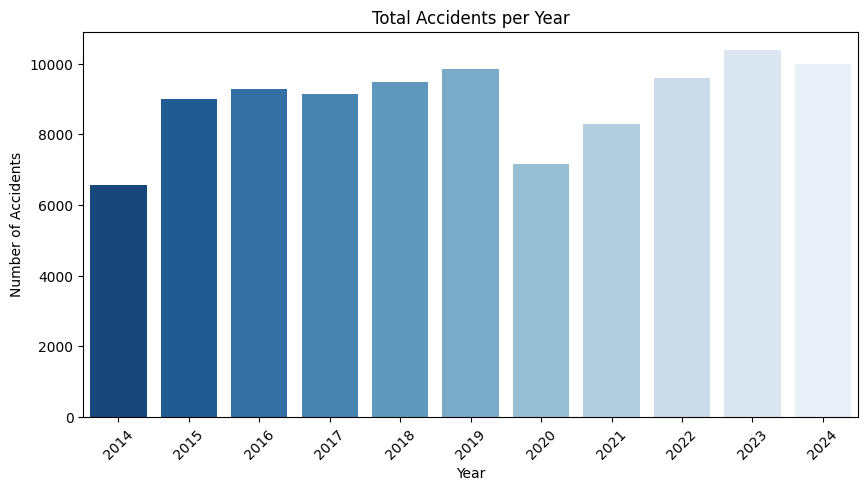

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 

conn = sqlite3.connect('transit_safety.db') 

query = "SELECT Year, COUNT(*) AS total_accidents FROM transit_safety GROUP BY Year ORDER BY Year DESC;"
df = pd.read_sql_query(query, conn)

# Plotting
plt.figure(figsize=(10, 5))
sns.barplot(x=df['Year'], y=df['total_accidents'], palette="Blues_r")
plt.xticks(rotation=45)
plt.title("Total Accidents per Year")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.show()

# Closing the database connection
conn.close()


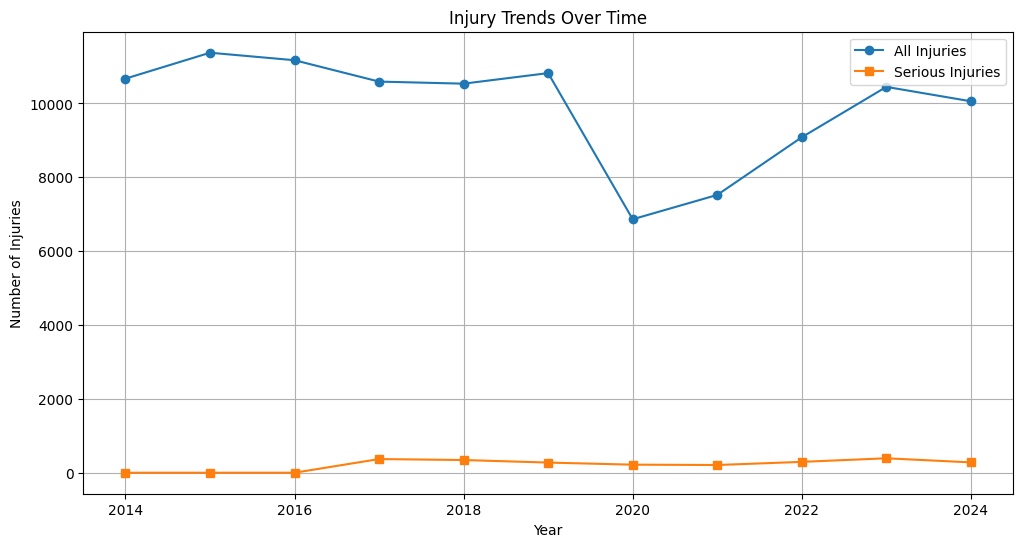

In [16]:
conn = sqlite3.connect('transit_safety.db')

# Injury severity trends
query = """
SELECT 
    Year,
    SUM(`Total Injuries`) as total_injuries,
    SUM(`Total Serious Injuries`) as serious_injuries
FROM transit_safety
GROUP BY Year
ORDER BY Year;
"""
df = pd.read_sql_query(query, conn)

plt.figure(figsize=(12,6))
plt.plot(df['Year'], df['total_injuries'], label='All Injuries', marker='o')
plt.plot(df['Year'], df['serious_injuries'], label='Serious Injuries', marker='s')
plt.title("Injury Trends Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Injuries")
plt.legend()
plt.grid(True)
plt.show()

conn.close()

/var/folders/8v/ms_zr9kd3_n0l_v4my0rcbn40000gn/T/ipykernel_92426/1208843977.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='accident_count', y='urban_area', data=df, palette="rocket")


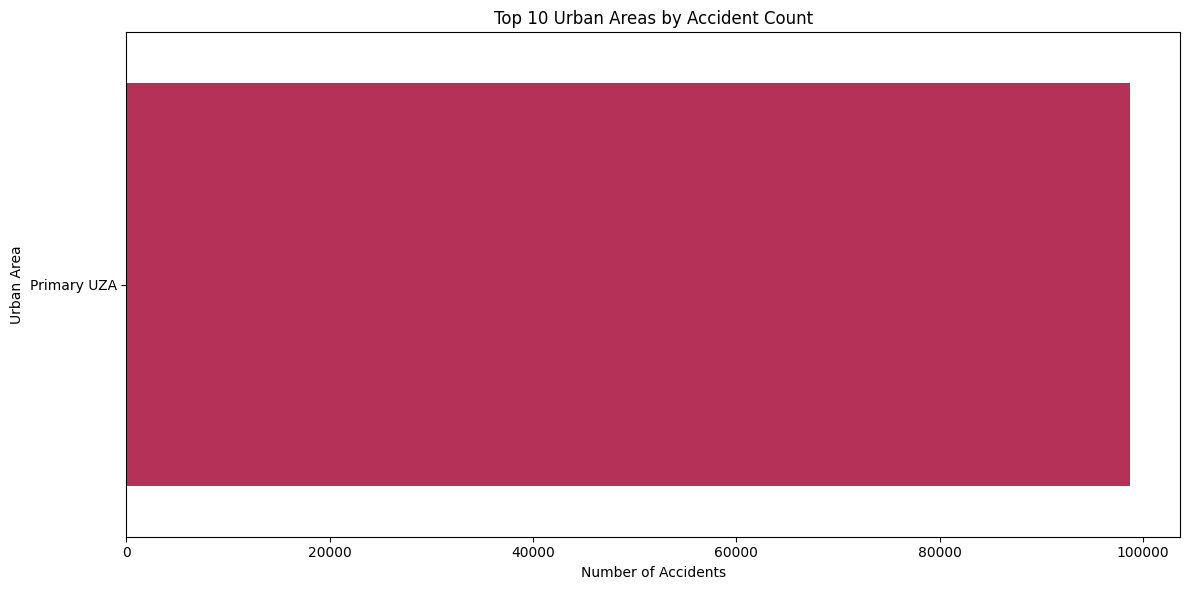

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sqlite3

conn = sqlite3.connect('transit_safety.db')

# Top 10 urban areas by accident count
query = """
SELECT 
    "Primary UZA" as urban_area,
    COUNT(*) as accident_count
    FROM transit_safety
    GROUP BY "Primary UZA"
    ORDER BY accident_count DESC
    LIMIT 10;
"""
df = pd.read_sql_query(query, conn)

plt.figure(figsize=(12,6))
sns.barplot(x='accident_count', y='urban_area', data=df, palette="rocket")
plt.title("Top 10 Urban Areas by Accident Count")
plt.xlabel("Number of Accidents")
plt.ylabel("Urban Area")
plt.tight_layout()
plt.show()

conn.close()

<Figure size 1400x700 with 0 Axes>

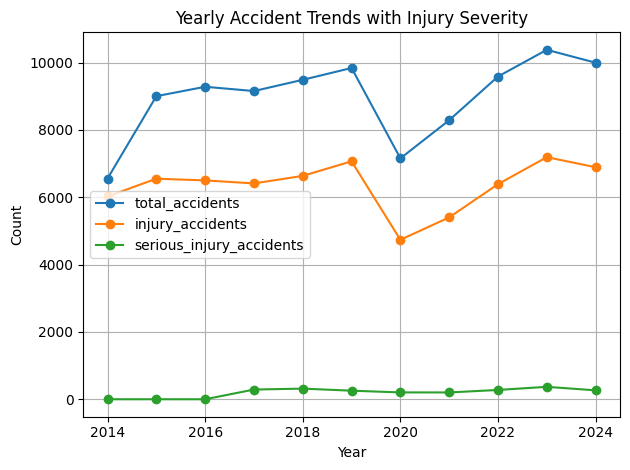

In [21]:
conn = sqlite3.connect('transit_safety.db')

# Yearly accident trends with injury severity
query = """
SELECT 
    Year as year,
    COUNT(*) as total_accidents,
    SUM(CASE WHEN "Total Injuries" > 0 THEN 1 ELSE 0 END) as injury_accidents,
    SUM(CASE WHEN "Total Serious Injuries" > 0 THEN 1 ELSE 0 END) as serious_injury_accidents
FROM transit_safety
GROUP BY Year
ORDER BY Year;
"""
df = pd.read_sql_query(query, conn)

plt.figure(figsize=(14,7))
df.set_index('year').plot(kind='line', marker='o')
plt.title("Yearly Accident Trends with Injury Severity")
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()

conn.close()

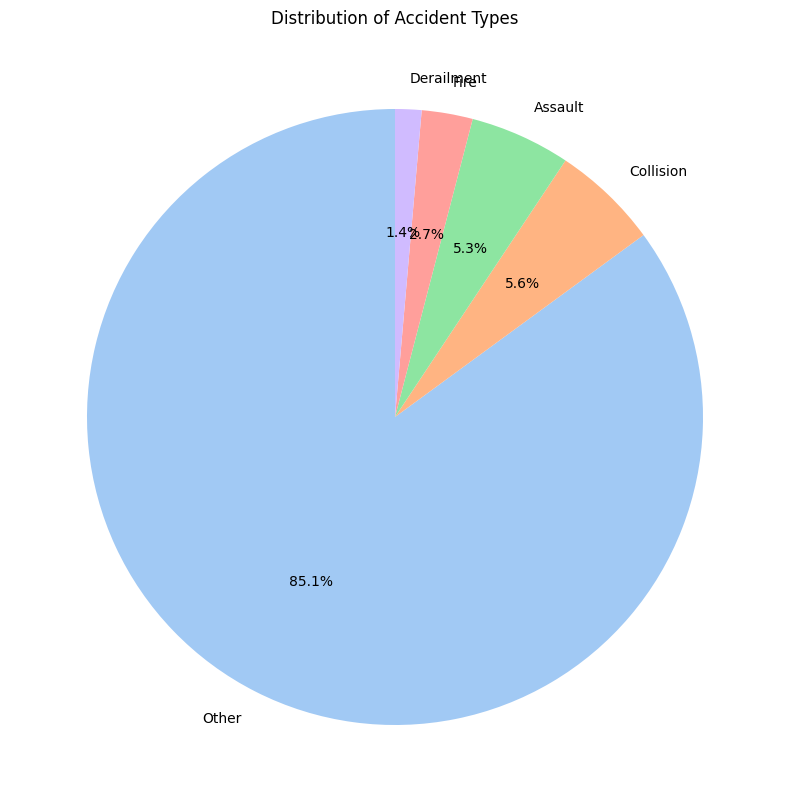

In [19]:
conn = sqlite3.connect('transit_safety.db')

# Common accident causes (simplified from event description)
query = """
SELECT 
    CASE
        WHEN LOWER(`Event Description`) LIKE '%collision%' THEN 'Collision'
        WHEN LOWER(`Event Description`) LIKE '%assault%' THEN 'Assault'
        WHEN LOWER(`Event Description`) LIKE '%derail%' THEN 'Derailment'
        WHEN LOWER(`Event Description`) LIKE '%fire%' THEN 'Fire'
        ELSE 'Other'
    END as accident_type,
    COUNT(*) as count
FROM transit_safety
GROUP BY accident_type
ORDER BY count DESC;
"""
df = pd.read_sql_query(query, conn)

plt.figure(figsize=(10,10))
plt.pie(df['count'], labels=df['accident_type'], autopct='%1.1f%%',
        colors=sns.color_palette("pastel"), startangle=90)
plt.title("Distribution of Accident Types")
plt.show()

conn.close()